In [ ]:
import warnings
warnings.filterwarnings('ignore')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV,SGDClassifier
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [2]:
imdb_data=pd.read_csv("/content/drive/MyDrive/IMDB Dataset.csv")

In [3]:
imdb_data.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


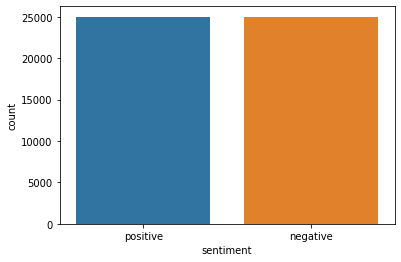

In [4]:
sns.countplot(imdb_data['sentiment'])

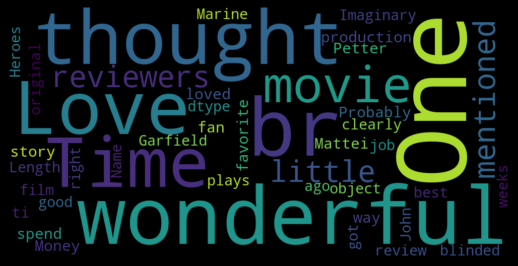

In [5]:
positive_text=imdb_data[imdb_data['sentiment']=='positive']['review']
wordcloud = WordCloud(width = 1000,height = 500,stopwords = STOPWORDS).generate(str(positive_text))
fig = plt.figure(figsize = (7,7),facecolor = 'k',edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

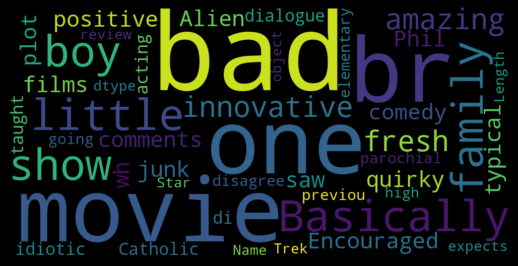

In [6]:
negative_text=imdb_data[imdb_data['sentiment']=='negative']['review']
wordcloud = WordCloud(width=1000,height=500,stopwords = STOPWORDS).generate(str(negative_text))
fig = plt.figure(figsize = (7,7),facecolor = 'k',edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [7]:
review_length=[]
for i in imdb_data['review']:
    review_length.append(len(i.split()))
print('Average length of review',sum(review_length)/50000)

Average length of review 231.15694


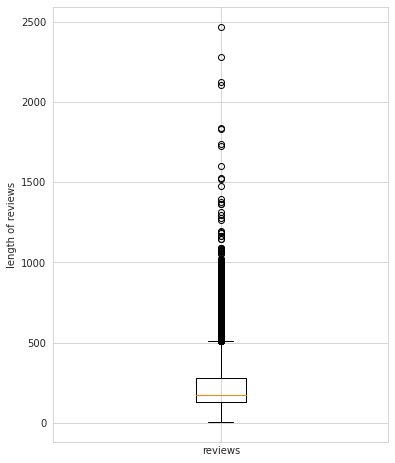

In [8]:
review_length=np.array(review_length)
df=pd.DataFrame(review_length)
sns.set_style("whitegrid")
plt.figure(figsize=(6,8))
plt.boxplot(df[0])
plt.xlabel('reviews')
plt.ylabel('length of reviews')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

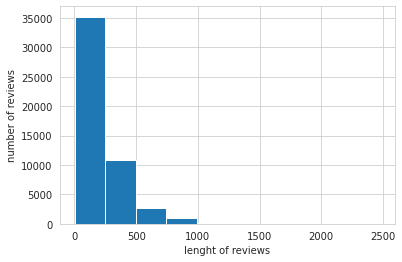

In [9]:
pd.Series(review_length).hist()
plt.ylabel("number of reviews")
plt.xlabel("lenght of reviews")
plt.show()

In [10]:
pd.Series(review_length).describe()

count    50000.000000
mean       231.156940
std        171.343997
min          4.000000
25%        126.000000
50%        173.000000
75%        280.000000
max       2470.000000
dtype: float64

In [11]:
positive_review_length=[]
for i in imdb_data[imdb_data['sentiment']=='positive']['review']:
    positive_review_length.append(len(i.split()))
print('Average length of positive reviews',sum(positive_review_length)/len(positive_review_length))

Average length of positive reviews 232.84932


In [12]:
negative_review_length=[]
for i in imdb_data[imdb_data['sentiment']=='negative']['review']:
    negative_review_length.append(len(i.split()))
print('Average length of negative reviews',sum(negative_review_length)/len(negative_review_length))

Average length of negative reviews 229.46456


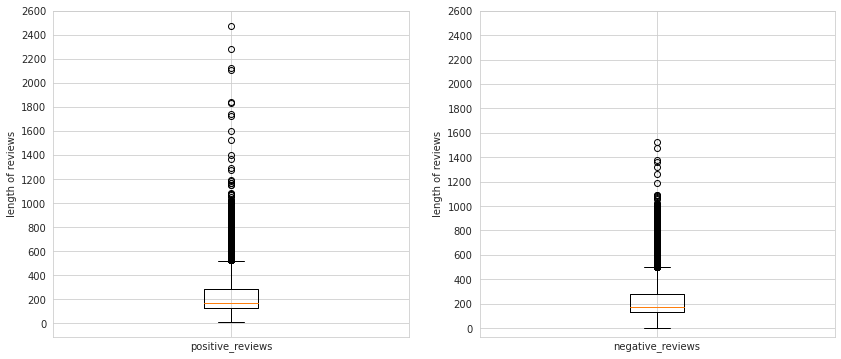

In [13]:
fig, (axis1, axis2) = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
positive_review_length=np.array(positive_review_length)
df_positive=pd.DataFrame(positive_review_length)
axis1.boxplot(df_positive[0])
axis1.set_xlabel('positive_reviews')
axis1.set_ylabel('length of reviews')
axis1.set_yticks([0,200,400,600,800,1000,1200,1400,1600,1800,2000,2200,2400,2600])
axis1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

negative_review_length=np.array(negative_review_length)
df_negative=pd.DataFrame(negative_review_length)
axis2.boxplot(df_negative[0])
axis2.set_xlabel('negative_reviews')
axis2.set_ylabel('length of reviews')
axis2.set_yticks([0,200,400,600,800,1000,1200,1400,1600,1800,2000,2200,2400,2600])
axis2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

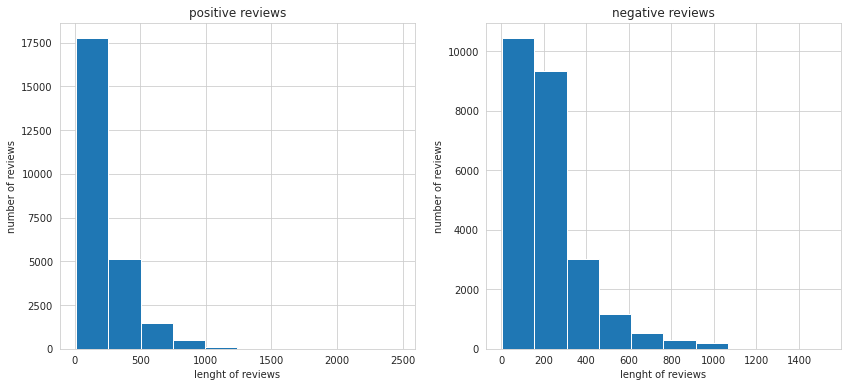

In [14]:
fig, (axis1, axis2) = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

axis1.hist(positive_review_length)
axis1.set_title("positive reviews")
axis1.set_ylabel("number of reviews")
axis1.set_xlabel("lenght of reviews")

axis2.hist(negative_review_length)
axis2.set_title('negative reviews')
axis2.set_ylabel("number of reviews")
axis2.set_xlabel("lenght of reviews")

plt.show()

In [15]:
pd.Series(positive_review_length).describe()

count    25000.000000
mean       232.849320
std        177.497046
min         10.000000
25%        125.000000
50%        172.000000
75%        284.000000
max       2470.000000
dtype: float64

In [16]:
pd.Series(negative_review_length).describe()

count    25000.000000
mean       229.464560
std        164.947795
min          4.000000
25%        128.000000
50%        174.000000
75%        278.000000
max       1522.000000
dtype: float64